In [1]:
import numpy as np
import scipy as sp
import matplotlib.pylab as plt
import pandas as pd
import os
from scipy.stats import norm
import math
import operator

In [2]:
#Importación de datos

ruta_entrada= os.path.join( '.','data')
ruta_salida = os.path.join( '.','output')
datos_valledupar = 'Valledupar'
datos_ideam_valledupar = 'IDEAM'
ruta_serie_valledupar_ideam= os.path.join(ruta_entrada,datos_valledupar,datos_ideam_valledupar+'.csv')
ideam_valledupar= pd.read_csv(ruta_serie_valledupar_ideam, sep = ';',
                encoding='latin-1')
datos_nrel_valledupar = 'NREL'
ruta_serie_valledupar_nrel= os.path.join(ruta_entrada,datos_valledupar,datos_nrel_valledupar+'.csv')
nrel_valledupar= pd.read_csv(ruta_serie_valledupar_nrel, sep = ';',
                encoding='latin-1')

datos_uribia = 'Uribia'
datos_ideam_uribia = 'IDEAM'
ruta_serie_uribia_ideam= os.path.join(ruta_entrada,datos_uribia,datos_ideam_uribia+'.csv')
ideam_uribia= pd.read_csv(ruta_serie_uribia_ideam, sep = ';',
                encoding='latin-1')
datos_nrel_uribia = 'NREL'
ruta_serie_uribia_nrel= os.path.join(ruta_entrada,datos_uribia,datos_nrel_uribia+'.csv')
nrel_uribia= pd.read_csv(ruta_serie_uribia_nrel, sep = ';',
                encoding='latin-1')

datos_sucre= 'Sucre'
datos_ideam_sucre = 'IDEAM'
ruta_serie_sucre_ideam= os.path.join(ruta_entrada,datos_sucre,datos_ideam_sucre+'.csv')
ideam_sucre= pd.read_csv(ruta_serie_sucre_ideam, sep = ';',
                encoding='latin-1')
datos_nrel_sucre = 'NREL'
ruta_serie_sucre_nrel= os.path.join(ruta_entrada,datos_sucre,datos_nrel_sucre+'.csv')
nrel_sucre= pd.read_csv(ruta_serie_sucre_nrel, sep = ';',
                encoding='latin-1')

datos_santamarta = 'SantaMarta'
datos_ideam_santamarta = 'IDEAM'
ruta_serie_santamarta_ideam= os.path.join(ruta_entrada,datos_santamarta,datos_ideam_santamarta+'.csv')
ideam_santamarta= pd.read_csv(ruta_serie_santamarta_ideam, sep = ';',
                encoding='latin-1')
datos_nrel_santamarta = 'NREL'
ruta_serie_santamarta_nrel= os.path.join(ruta_entrada,datos_santamarta,datos_nrel_santamarta+'.csv')
nrel_santamarta= pd.read_csv(ruta_serie_santamarta_nrel, sep = ';',
                encoding='latin-1')

datos_medellin = 'Medellin'
datos_ideam_medellin = 'IDEAM'
ruta_serie_medellin_ideam= os.path.join(ruta_entrada,datos_medellin,datos_ideam_medellin+'.csv')
ideam_medellin= pd.read_csv(ruta_serie_medellin_ideam, sep = ';',
                encoding='latin-1')
datos_nrel_medellin = 'NREL'
ruta_serie_medellin_nrel= os.path.join(ruta_entrada,datos_medellin,datos_nrel_medellin+'.csv')
nrel_medellin= pd.read_csv(ruta_serie_medellin_nrel, sep = ';',
                encoding='latin-1')

datos_carmen = 'Carmendebolivar'
datos_ideam_carmen = 'IDEAM'
ruta_serie_carmen_ideam= os.path.join(ruta_entrada,datos_carmen,datos_ideam_carmen+'.csv')
ideam_carmen= pd.read_csv(ruta_serie_carmen_ideam, sep = ';',
                encoding='latin-1')
datos_nrel_carmen = 'NREL'
ruta_serie_carmen_nrel= os.path.join(ruta_entrada,datos_carmen,datos_nrel_carmen+'.csv')
nrel_carmen= pd.read_csv(ruta_serie_carmen_nrel, sep = ';',
                encoding='latin-1')

datos_cali = 'Cali'
datos_ideam_cali = 'IDEAM'
ruta_serie_cali_ideam= os.path.join(ruta_entrada,datos_cali,datos_ideam_cali+'.csv')
ideam_cali= pd.read_csv(ruta_serie_cali_ideam, sep = ';',
                encoding='latin-1')
datos_nrel_cali = 'NREL'
ruta_serie_cali_nrel= os.path.join(ruta_entrada,datos_cali,datos_nrel_cali+'.csv')
nrel_cali= pd.read_csv(ruta_serie_cali_nrel, sep = ';',
                encoding='latin-1')

datos_barranquilla = 'Barranquilla'
datos_ideam_barranquilla = 'IDEAM'
ruta_serie_barranquilla_ideam= os.path.join(ruta_entrada,datos_barranquilla,datos_ideam_barranquilla+'.csv')
ideam_barranquilla= pd.read_csv(ruta_serie_barranquilla_ideam, sep = ';',
                encoding='latin-1')
datos_nrel_barranquilla = 'NREL'
ruta_serie_barranquilla_nrel= os.path.join(ruta_entrada,datos_barranquilla,datos_nrel_barranquilla+'.csv')
nrel_barranquilla= pd.read_csv(ruta_serie_barranquilla_nrel, sep = ';',
                encoding='latin-1')

## Punto 1

In [3]:
def GHIprom(serie_horaria):  #Entrada es una serie en resolución horaria, retorna DataFrame de promedios diarios mensuales
    agnos=sorted(serie_horaria['AÑO'].unique())
    ghi_df=pd.DataFrame(columns=["AÑO","MES","DIAS","GHImes"])
    energia = list(serie_horaria)[-1]
    for agno in agnos:
        for mes in range(1,13):
            dias = sorted(serie_horaria[(serie_horaria['AÑO'] == agno) &
                        (serie_horaria['MES'] == mes)]["DIA"].unique())
            ghi_mes = serie_horaria.loc[((serie_horaria["AÑO"] == agno)
                            & (serie_horaria["MES"] == mes)),
                                        energia].sum()/1000
            ghi_dict = {"AÑO":agno, "MES":mes, "DIAS":dias[-1],
                        "GHImes":ghi_mes}
            ghi_df = ghi_df.append(ghi_dict, ignore_index=True)
        
        
    agnos2=sorted(ghi_df['AÑO'].unique())
    df_dias=pd.DataFrame(columns=["AÑO","MES","GHIdia"])
    for agno in agnos2:
        for mes in range(1,13):
            dia=ghi_df.loc[((ghi_df['AÑO']==agno) &
                                   (ghi_df['MES']==mes)),'DIAS'].item()
            ghi_diario=ghi_df.loc[((ghi_df['AÑO']==agno) & 
                                          (ghi_df['MES']==mes)),'GHImes'].item()/dia
            ghi_dict = {'AÑO':agno,'MES':mes,'GHIdia':ghi_diario}
            df_dias=df_dias.append(ghi_dict,ignore_index=True)
            
    return df_dias

def ENFICC(serie): #Calcula la ENFICC 99% del DataFrame determinado en la función anterior
    ENFICC=serie.quantile(0.01,numeric_only=True)['GHIdia']
    
    return print('La ENFICC 99% es', ENFICC, 'kW/m^2')

## Punto 2

In [4]:
def graficas(serie_ideam,serie_corregida,serie_nrel): #Entra serie ideam, serie corregida y serie nrel en resolucion horaria
    prom_serie_ideam=GHIprom(serie_ideam)
    prom_serie_corregida=GHIprom(serie_corregida)
    prom_serie_nrel=GHIprom(serie_nrel)
    
    prom_serie_ideam=sorted(prom_serie_ideam["GHIdia"])
    prom_serie_corregida=sorted(prom_serie_corregida["GHIdia"])
    prom_serie_nrel=sorted(prom_serie_nrel["GHIdia"])
    
    x1=list(range(len(prom_serie_ideam)))
    x2=list(range(len(prom_serie_corregida)))
    x3=list(range(len(prom_serie_nrel)))
    
    plt.plot(x1,prom_serie_ideam/prom_serie_ideam[0],'r',label='IDEAM')
    plt.plot(x2,prom_serie_corregida/prom_serie_ideam[0],'b',label='corregida')
    plt.plot(x3,prom_serie_nrel/prom_serie_ideam[0],'g',label='NREL')
    
    plt.xlabel('datos')
    plt.ylabel('Energía/Energía base ideam')
    plt.legend()
    return plt.show()

## Punto 3

In [5]:
def MCP(serie_corta,serie_larga): #Entra una serie de corto tiempo y una serie de referencia de duración completa.
    correcta=serie_larga.copy()
    serie_larga_comun=correcta[(correcta['AÑO']>=serie_corta.iloc[0,0]) & (correcta['AÑO']<=serie_corta.iloc[-1,0]) 
                                  &(correcta['MES']>=serie_corta.iloc[0,1]) & (correcta['MES']<=serie_corta.iloc[-1,1]) ]
    ghi_obj=serie_corta['IDEAM'].mean()
    sigma_obj=serie_corta['IDEAM'].std()
    ghi_ref=serie_larga_comun['NREL'].mean()
    sigma_ref=serie_larga_comun['NREL'].std()
    ghi_i=(ghi_obj-(sigma_obj/sigma_ref)*ghi_ref)+(sigma_obj/sigma_ref)*correcta['NREL']
    ghi_i[ghi_i<=0]=0
    correcta['NREL']=ghi_i
    return correcta #Retorna serie con datos GHI ajustados

## Punto 4

#### MBE

In [6]:
def MBE(serie_mod,serie_obs): #Entra serie corregida o nrel, y serie ideam
    serie_mod=GHIprom(serie_mod)
    serie_obs=GHIprom(serie_obs)
    serie_mod=serie_mod[(serie_mod['AÑO']>=serie_obs.iloc[0,0]) & (serie_mod['AÑO']<=serie_obs.iloc[-1,0]) 
                       & (serie_mod['MES']>=serie_obs.iloc[0,1]) &(serie_mod['MES']<=serie_obs.iloc[-1,1])]
    ghi_mod=sorted(serie_mod['GHIdia'])
    ghi_obs=sorted(serie_obs['GHIdia'])
    suma1=sum(ghi_mod)
    suma2=sum(ghi_obs)
    error=suma1-suma2
    resultado=error/suma2
    return print('El MBE es:',"{:.2%}".format(resultado) )

#### RMSE

In [7]:
def RMSE(serie_mod,serie_obs): #Entra serie corregida o nrel, y serie ideam
    serie_mod=GHIprom(serie_mod)
    serie_obs=GHIprom(serie_obs)
    serie_mod=serie_mod[(serie_mod['AÑO']>=serie_obs.iloc[0,0]) & (serie_mod['AÑO']<=serie_obs.iloc[-1,0]) 
                       & (serie_mod['MES']>=serie_obs.iloc[0,1]) &(serie_mod['MES']<=serie_obs.iloc[-1,1])]
    ghi_mod=sorted(serie_mod['GHIdia'])
    ghi_obs=sorted(serie_obs['GHIdia'])
    sumatoria=0
    error=0
    for i in range(0,len(ghi_obs)):
        resta=(ghi_obs[i]-ghi_mod[i])**2
        error=error+resta
        sumatoria=sumatoria+ghi_obs[i]
    error=math.sqrt(error/len(ghi_obs))
    resultado=error/(max(ghi_obs)-min(ghi_obs))
        
    return print('El RMSE es:',"{:.2%}".format(resultado) )

#### PVALUE

In [8]:
def KSI(serie_mod,serie_obs):
    serie_mod=serie_mod[(serie_mod['AÑO']>=serie_obs.iloc[0,0]) & (serie_mod['AÑO']<=serie_obs.iloc[-1,0]) 
                       & (serie_mod['MES']>=serie_obs.iloc[0,1]) &(serie_mod['MES']<=serie_obs.iloc[-1,1])]
    ghi_mod=sorted(serie_mod['GHIdia'])
    ghi_obs=sorted(serie_obs['GHIdia'])
    
    error=sp.stats.ks_2samp(ghi_mod,ghi_obs)
    return print('El pvalue es:',"{:.2%}".format(error[-1]))

# Análisis

## Valledupar

Para empezar, se calculan los promedios diarios mensual de GHI para los datos del IDEAM y de NREL, para después determinar la ENFICC de cada uno de ellos. En este caso, el primer resultado corresponde a los datos de IDEAM, mientras que el segundo corresponde a los datos de NREL.

In [9]:
promedio_ideam_valledupar=GHIprom(ideam_valledupar)
promedio_nrel_valledupar=GHIprom(nrel_valledupar)
enficc_ideam_valledupar=ENFICC(promedio_ideam_valledupar)
enficc_nrel_valledupar=ENFICC(promedio_nrel_valledupar)

La ENFICC 99% es 4.56900737661 kW/m^2
La ENFICC 99% es 5.06265316667 kW/m^2


Se observa cierta discrepancia entre cada uno de los valores calculados. El valor del GHI diario mensual que se calcula sobre los datos de NREL supera por 0.5 kW/m^2 al resultado obtenido utilizando como base los datos medidos en tierra.

Ahora, a través de la correción MCP, se buscará que, a partir de ciertas franjas de tiempo tomadas de los datos medidos en tierra y de una serie de referencia (NREL), se llegue a una serie de datos de promedio diario mensual de GHI, observando el efecto que tiene seleccionar temporalidades que presentaron fenómenos (como el fenómeno de La Niña o el Niño). En el año 2010, según la revista Semana, se tuvo la peor temporada de La Niña, por lo cual se tomará este año como serie base para realizar el ajuste y observar el comportamiento de la serie corregida.

In [10]:
nina_2010_valledupar=ideam_valledupar[ideam_valledupar['AÑO']==2010] #se toma sólo el año a analizar
nina_2010_valledupar_corregida=MCP(nina_2010_valledupar,nrel_valledupar) #Se realiza el ajuste
promedio_nina_2010_valledupar=GHIprom(nina_2010_valledupar_corregida) #Se determina la serie con los promedios diarios mensuales
enficc_nina_2010_valledupar=ENFICC(promedio_nina_2010_valledupar) #se determina la ENFICC

La ENFICC 99% es 4.4688224469 kW/m^2


Se observa que, realizando un ajuste a partir de un año con menor cantidad de radiación de lo usual, se llega a un valor de la ENFICC menor a lo que se obtuvo para los dos casos anteriores. La reducción en este valor tiene sentido debido a que, al utilizar una serie donde se presentó fenómeno de La Niña para realizar un ajuste, se esperaría que los datos obtenidos a través de la correción sean de menor magnitud y, por lo tanto, el valor que se puede superar el 99% de las veces sea menor.

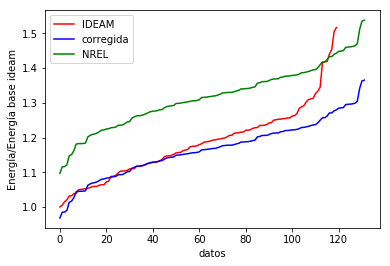

In [11]:
graficas(ideam_valledupar,nina_2010_valledupar_corregida,nrel_valledupar)

En la gráfica recién presentada se observa el comportamiento de la energía para cada una de las series analizadas, las cuales están normalizadas con respecto al menor valor del promedio diario mensual de la energía obtenida de IDEAM. La corrección llevada a cabo hace quer los primeros datos se asemejen al IDEAM. Sin embargo, estos empiezan a presentar una mayor diferencia conforme la energía aumenta. Lo anterior se debe a que, como fue mencionado anteriormente, al seleccionar un año en donde el GHI fue menor a lo normal, la serie total ajustada obtenida no alcanzará valores tan altos como los que se esperarían, si se compara con la serie real medida en tierra y la satelital.

Para ilustrar de mejor manera lo anterior, se determinan los indicadores de error entre la serie de IDEAM y la corregida.

In [12]:
mbe_nina_valledupar=MBE(nina_2010_valledupar_corregida,ideam_valledupar)
rmse_nina_valledupar=RMSE(nina_2010_valledupar_corregida,ideam_valledupar)
pvalue_nina_valledupar=KSI(promedio_nina_2010_valledupar,promedio_ideam_valledupar)

El MBE es: -1.25%
El RMSE es: 7.29%
El pvalue es: 45.97%


Para calcular el MBE y RMSE se usan las series en resolución horaria, mientras que, para la determinación del pvalue, se usan las series con el promedio diario mensual.
En particular, si se observa el pvalue, sería posible conlcuir que, en cierta medida, la serie ajustada proviene de la serie de IDEAM, ya que el mismo se encuentra casi a la mitad del 100%. De acercarse más a este valor, se tendría más seguridad de lo ya mencionado y, por lo tanto, la corrección sería más adecuada. El análisis de el error MBE y RMSE se realizará más adelante, comparando estos con los obtenidos al tomar una serie para corregir que presente datos más adecuados. 

Ahora, para contrastar con los resultados obtenidos al tomar como serie de ajuste datos de un año con La Niña, se realizará el mismo procedimiento, pero tomando un año que no presente ninguna de las dos situaciones (Niño o Niña). Entonces, se tomará el año 2014.

In [13]:
valledupar_ideam_2014=ideam_valledupar[ideam_valledupar['AÑO']==2014] #se toma sólo la serie de interés.
valledupar_ideam_2014_corregida=MCP(valledupar_ideam_2014,nrel_valledupar) #Se realiza el ajuste.
promedio_valledupar_ideam_2014=GHIprom(valledupar_ideam_2014_corregida) #Se determina la serie con los promedios diarios mensuales
enficc_ideam_2014_valledupar=ENFICC(promedio_valledupar_ideam_2014) #se determina la ENFICC

La ENFICC 99% es 4.50538977385 kW/m^2


Se obtiene, entonces, un valor para la ENFICC mayor al calculado con los datos del año de La Niña, lo cual era de esperarse. De lo anterior se deriva que el resultado obtenido se asemeja más a la ENFICC medida en tierra (5.06). A continuación se presenta la gráfica con los mismos datos de NREL e IDEAM, comparados con la nueva serie ajustada:

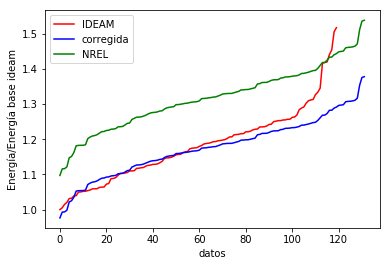

In [14]:
graficas(ideam_valledupar,valledupar_ideam_2014_corregida,nrel_valledupar)

Al observar la gráfica obtenida, se puede ver como los datos finales de la serie corregida se acercan un poco más a la serie medida en tierra, mejorando el error en ese sector de los mismos. Además de esto, para valores de la energía por energía base de IDEAM más bajos, se sigue manteniendo una similitud entre los datos, como fue visto  para el caso analizado anteriormente. A partir de esto sería de esperar que los indicadores de error bajasen sus respectivos porcentajes, a excepción del pvalue, que debería acercarse más a 100%.

In [15]:
mbe_valledupar_2014=MBE(valledupar_ideam_2014_corregida,ideam_valledupar)
rmse_valledupar_2014=RMSE(valledupar_ideam_2014_corregida,ideam_valledupar)
pvalue_nina_valledupar=KSI(promedio_valledupar_ideam_2014,promedio_ideam_valledupar)

El MBE es: -0.40%
El RMSE es: 6.65%
El pvalue es: 67.38%


Como fue mencionado anteriormente, se ve que los errores MBE y RMSE disminuyen en comparación a los valores que se determinaron para el caso de la serie del año de La Niña. Por otra parte, el pvalue se acerca más al 100%, a partir de lo cual se tiene mayor certeza de que la serie corregida proviene de los datos originales medidos en tierra.

De los dos análisis realizados se concluye que se debe ser cuidadoso al momento de seleccionar un periodo para ajustar. Este debe ser un año que no presente distorsiones climáticas que afecten los niveles de radiación y, por ende, la serie que se obtenga a partir de esta traiga consigo un sesgo.

## Santa Marta

Para empezar, se calculan las series de promedios diarios mensuales GHI para los datos de NREL e IDEAM. El primer resultado corresponde a la ENFICC a partir de IDEAM y, el segundo, a partir de NREL.

In [16]:
promedio_ideam_santamarta=GHIprom(ideam_santamarta)
promedio_nrel_santamarta=GHIprom(nrel_santamarta)
enficc_ideam_santamarta=ENFICC(promedio_ideam_santamarta)
enficc_nrel_santamarta=ENFICC(promedio_nrel_santamarta)

La ENFICC 99% es 4.04071664383 kW/m^2
La ENFICC 99% es 4.536077 kW/m^2


Para este caso, la ENFICC calculada por medio de los datos medidos en tierra es menor a este mismo valor para el caso NREL. Sin embargo, debe aclararse que, para Santa Marta (las mediciones inician en el año 2008), los datos no llegan a cumplir los 10 años requeridos. Esta es una razón por la cual se observa la discrepancia entre los resultados obtenidos. Contrario a Valledupar, este resultado es mayor para la información satelital. Se observa un comportamiento similar a la ciudad anterior, ya que los valores difieren también, aproximadamente, por 0.5 kW/m^2.

Se probará, ahora, una corrección realizada con base a un año en donde se haya presentado fenómeno de El Niño, con el fin de analizar el impacto que genera esto sobre la serie corregida que se genere a partir de esto. Según el periódico El Tiempo, El Niño del 2015 fue uno de los más devastadores, siendo el departamento del Magdalena uno de los más afectados. Entonces, se analizará el impacto que genera sobre la serie corregida el utilizar este año como serie para ajustar.

In [17]:
nino_2015_santamarta=ideam_santamarta[ideam_santamarta['AÑO']==2015] #se toma sólo el año a analizar
nino_2015_santamarta_corregida=MCP(nino_2015_santamarta,nrel_santamarta) #Se realiza el ajuste
promedio_nino_2015_santamarta=GHIprom(nino_2015_santamarta_corregida) #Se determina la serie con los promedios diarios mensuales
enficc_nino_2015_santamarta=ENFICC(promedio_nino_2015_santamarta) #se determina la ENFICC

La ENFICC 99% es 4.92027323961 kW/m^2


En este caso, la discrepancia entre este valor y la ENFICC para IDEAM y NREL es mayor a lo visto para la ciudad de Valledupar. En la siguiente gráfica se observa la manera como difieren los datos.

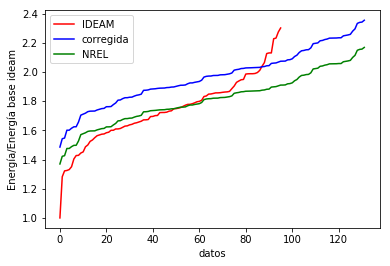

In [18]:
graficas(ideam_santamarta,nino_2015_santamarta_corregida,nrel_santamarta)

Como era de esperarse debido a un mayor ENFICC, los datos de energía para la serie corregida superan tanto a la serie IDEAM, como a la NREL. Aunque la serie de IDEAM contiene menor cantidad de datos, se observa que el valor máximo es casi el mismo que el máximo que se obtiene para la serie corregida. A continuación se determinan los errores para este caso:

In [19]:
mbe_nino_santamarta_2015=MBE(nino_2015_santamarta_corregida,ideam_santamarta)
rmse_nino_santamarta_2015=RMSE(nino_2015_santamarta_corregida,ideam_santamarta)
KSI(promedio_nino_2015_santamarta,promedio_ideam_santamarta)

El MBE es: 13.12%
El RMSE es: 17.97%
El pvalue es: 0.00%


Anzalizando los resultados para los errores MBE y RMSE, es posible determinar que, como se mencionó anteriormente, el error que se tiene entre la serie ajustada y los valores medidos en tierra son significativos. Lo anterior se refleja de mejor manera en el pvalue, del cual se obtiene 0%, lo que significa que, teóricamente, la serie obtenida no proviene de una parte de la serie de IDEAM. Se puede ver, entonces, el efecto que genera usar como serie para ajustar un año en el que se tenga este tipo de fenómeno. Lo mismo se pudo observar para La Niña en la ciudad de Valledupar, con la diferencia de que los datos corregidos de energía fueron menores a los de IDEAM y NREL. 

## Cali

De igual forma que las ciudades anteriores, se calcula la ENFICC para los datos de NREL e IDEAM.

In [20]:
promedio_ideam_cali=GHIprom(ideam_cali)
promedio_nrel_cali=GHIprom(nrel_cali)
enficc_ideam_cali=ENFICC(promedio_ideam_cali)
enficc_nrel_cali=ENFICC(promedio_nrel_cali)

La ENFICC 99% es 3.33077931605 kW/m^2
La ENFICC 99% es 4.36085916667 kW/m^2


Contrario a los casos anteriores, la ENFICC calculada para cada una de las series de datos es casi la misma, variando sólo en, aproximadanete, 0.03. Este comportamiento se verá reflejado en la gráfica más adelante.

Esta vez, en lugar de tomar años donde se tengan fenómenos climáticos, se realizará un ajuste utilizando una serie con una temporalidad menor a la exigida en el protocolo (en donde se pide un año, como mínimo). Se toman entonces 6 meses del año 2006 y se realiza el respectivo análisis.

In [21]:
serie_corta_cali_2008=ideam_cali[ideam_cali['AÑO']==2008] #se toma sólo el año a analizar
serie_corta_cali=serie_corta_cali_2008[(serie_corta_cali_2008['MES']>=3) & (serie_corta_cali_2008['MES']<=8)]
serie_corta_cali_corregida=MCP(serie_corta_cali,nrel_cali) #Se realiza el ajuste
promedio_corta_cali_ideam=GHIprom(serie_corta_cali_corregida) #Se determina la serie con los promedios diarios mensuales
enficc_corta_cali=ENFICC(promedio_corta_cali_ideam) #se determina la ENFICC

La ENFICC 99% es 3.70823246591 kW/m^2


Se obtiene un valor para la ENFICC de 3.7 kW/m^2. Este valor es ligeramente mayor que el resultado sólo para NREL y supera un poco más al resultado de IDEAM. Se observa a continuación la gráfica con los valores de GHI para la serie ajustada, IDEAM y NREL.

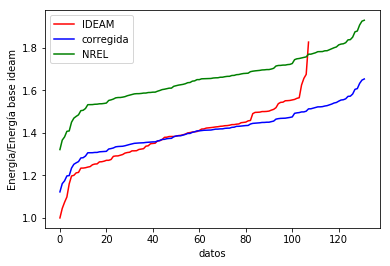

In [22]:
graficas(ideam_cali,serie_corta_cali_corregida,nrel_cali)

Se observa que la serie corregida se acerca a los valores de IDEAM para cuando la energía está en alrededor de 1.3. Los errores asociados a esta serie corregida se calculan a continuación:

In [23]:
mbe_corta_cali=MBE(serie_corta_cali_corregida,ideam_cali)
rmse_corta_cali=RMSE(serie_corta_cali_corregida,ideam_cali)
pvalue_corta_cali=KSI(promedio_corta_cali_ideam,promedio_ideam_cali)

El MBE es: 1.87%
El RMSE es: 4.93%
El pvalue es: 12.47%


Aunque el error MBE y RMSE es más bajo que los calculados para los casos anteriores, también se tiene un pvalue de menor valor. Lo anterior indica que la serie corregida no proviene de datos de IDEAM. De esto se deriva el por qué se debe tomar al menos una serie de un año como base para realizar el ajuste. Tomándo un menor tiempo se llega a resultados que difieren más de lo real, medido en tierra.

## Sucre

Se determina la ENFICC para las dos series de datos (IDEAM y NREL):

In [24]:
promedio_ideam_sucre=GHIprom(ideam_sucre)
promedio_nrel_sucre=GHIprom(nrel_sucre)
enficc_ideam_sucre=ENFICC(promedio_ideam_sucre)
enficc_nrel_sucre=ENFICC(promedio_nrel_sucre)

La ENFICC 99% es 2.37964439946 kW/m^2
La ENFICC 99% es 4.8399985 kW/m^2


La ENFICC obtenida para los datos de IDEAM es la más baja calculada hasta el momento. De igual manera, la diferencia entre este valor y el obtenido por medio de los datos satelitales es significativa. Lo anterior muestra que no siempre puede ser confiable el utilizar los datos obtenidos por satélites para análisis por sí solos. A continuación, se realiza un ajuste con un año aleatorio de la serie de IDEAM para determinar si los resultados se acercan más y ser capaces de concluir sobre la efectividad de la corrección sobre datos NREL que presenten gran variación con respecto a lo medido en tierra.

In [25]:
sucre_ideam_aleatorio=ideam_sucre[ideam_sucre['AÑO']==2013] #se toma cualquier año
sucre_ideam_aleatorio_corregida=MCP(sucre_ideam_aleatorio,nrel_sucre) #Se realiza el ajuste
promedio_sucre_aleatorio=GHIprom(sucre_ideam_aleatorio_corregida) #Se determina la serie con los promedios diarios mensuales
enficc_sucre_aleatorio=ENFICC(promedio_sucre_aleatorio) #se determina la ENFICC

La ENFICC 99% es 4.3116673626 kW/m^2


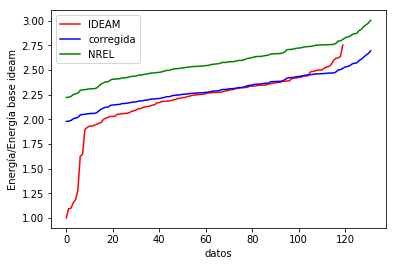

In [26]:
graficas(ideam_sucre,sucre_ideam_aleatorio_corregida,nrel_sucre)

Se obtiene una ENFICC de 4.31 kW/m^2. En la gráfica se observa el efecto de el ajuste realizado. Se tiene cierta similitud entre los datos cuando estos se acercan a 2.25. Los datos varían significativamente para valores de manor magnitud. Los erroes asosiados a la corrección se muestran a continuación:

In [27]:
mbe_sucre=MBE(sucre_ideam_aleatorio_corregida,ideam_sucre)
rmse_sucre=RMSE(sucre_ideam_aleatorio_corregida,ideam_sucre)
pvalue_sucre=KSI(promedio_sucre_aleatorio,promedio_ideam_sucre)

El MBE es: 4.91%
El RMSE es: 12.10%
El pvalue es: 8.89%


Los errores muestran que la aproximación realizada no es muy adecuada. Se tiene un pvalue de 8.89%, lo suficientemente bajo para poder concluir que el ajuste no viene de la serie de IDEAM. Como se mencionó al inicio del análisis para esta ciudad, las diferencias entre las series de datos de IDEAM y NREL tendrían impacto negativo hacia un ajuste que se realice con algún año aleatorio que se tenga en mano. 
Ahora, el análisis se realizará teniendo un año donde las temperaturas presentas en el departamento fueron menores a lo usual, con el fin de observar la "propgación" del error debido a la discrepancia de los datos satelitales y de el hecho de usar un año con anomalías climáticas.

In [28]:
ideam_sucre_2011=ideam_sucre[ideam_sucre['AÑO']==2011] #se toma el año deseado.
ideam_sucre_2011_corregida=MCP(ideam_sucre_2011,nrel_sucre) #Se realiza el ajuste
promedio_2011_sucre=GHIprom(ideam_sucre_2011_corregida) #Se determina la serie con los promedios diarios mensuales
ideam_sucre_2011_enficc=ENFICC(promedio_2011_sucre) #se determina la ENFICC

La ENFICC 99% es 3.73364812401 kW/m^2


Se puede ver que la energía que se puede superar el 99% de las veces no se acerca ni a los datos de IDEAM ni a los datelitales. Esto se verá reflejado en la gráfica presentada a continuación:

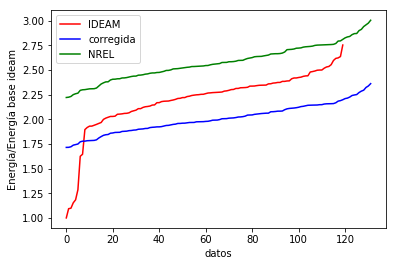

In [29]:
graficas(ideam_sucre,ideam_sucre_2011_corregida,nrel_sucre)

Se observa en la gráfica la diferencia que se observa entre las tres series de datos. Como era de esperarse, la serie corregida se encuentra por debajo de IDEAM y NREL por le hecho de haber tomado un año con menor radiación a la usual. Esta discrepancia se ve mejor reflejada en los indicadores de error:

In [30]:
mbe_sucre_20100=MBE(ideam_sucre_2011_corregida,ideam_sucre)
rmse_sucre=RMSE(ideam_sucre_2011_corregida,ideam_sucre)
pvalue_sucre_2011=KSI(promedio_2011_sucre,promedio_ideam_sucre)

El MBE es: -8.60%
El RMSE es: 15.38%
El pvalue es: 0.00%


Con respecto a los errores calculados para el caso anterior, esta vez se tiene un mayor aumento para MBE y RMSE, pasando de 4.91% y 12.10% a -8.6% y 15.38%, respectivamente. Por otro lado, el pvalue de 0% muestra que la diferencia entre la serie corregida y la medida en tierra es lo suficientemente significativa para concluir que no hay forma de que el ajsute provenga de esa serie.

En conclusión, el hecho de que los datos setelitales para esta ciudad fuesen, por gran medida, diferentes a la información proporcionada por el IDEAM, se generan errores mayores a la hora de realizar ajustes con base a esta información que no se mide en tierra, error que puede ser aún mayor si los datos que se tienen de IDEAM para ajustar son de años con comportamientos no comunes.

## Uribia

Se determina la ENFICC para los datos satelitales y medidos en tierra:

In [31]:
promedio_ideam_uribia=GHIprom(ideam_uribia)
promedio_nrel_uribia=GHIprom(nrel_uribia)
enficc_ideam_uribia=ENFICC(promedio_ideam_uribia)
enficc_nrel_uribia=ENFICC(promedio_nrel_uribia)

La ENFICC 99% es 4.2818970848 kW/m^2
La ENFICC 99% es 4.62250183333 kW/m^2


Contrario al caso de Sucre, los resultados obtenidos se asemejan más, por lo cual se esperaría que, al realizar un ajuste, la corrección obtenida presente buenos indicadores de error. 
Para esto, se tomará el año 2007 para realizar el ajuste, analizando los errores y la gráfica que se obtenga.

In [32]:
ideam_uribia_2012=ideam_uribia[ideam_uribia['AÑO']==2012] #se toma el año deseado.
ideam_uribia_2012_corregida=MCP(ideam_uribia_2012,nrel_uribia) #Se realiza el ajuste
promedio_2012_uribia=GHIprom(ideam_uribia_2012_corregida) #Se determina la serie con los promedios diarios mensuales
ideam_uribia_2012_enficc=ENFICC(promedio_2012_uribia) #se determina la ENFICC

La ENFICC 99% es 4.3174614176 kW/m^2


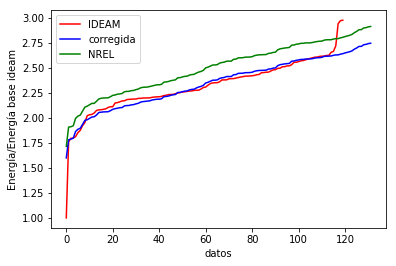

In [33]:
graficas(ideam_uribia,ideam_uribia_2012_corregida,nrel_uribia)

In [34]:
mbe_2012_uribia=MBE(ideam_uribia_2012_corregida,ideam_uribia)
rmse_2012_uribia=RMSE(ideam_uribia_2012_corregida,ideam_uribia)
pvalue_2012_uribia=KSI(promedio_2012_uribia,promedio_ideam_uribia)

El MBE es: 1.61%
El RMSE es: 4.32%
El pvalue es: 8.89%


Aunque el pvalue es menor a otros casos ya analizados, los errores MBE y RMSE son, de igual manera, menos a otras  localizaciones. Lo anterior se ve reflejado en la gráfica presentada en la parte superior, en donde se observa la similitud entre la serie IDEAM y la corregida. Como se mencionó anteriormente, lo anterior era de esperarse por la similitud entre la ENFICC para los datos medidos en tierra y los satelitales.

Ahora, se realiza una corrección usando solamente un periodo de tres meses de los datos medidos en tierra, de este mismo año ya anlizado, para observar la diferencia que esto genera con los errores recién determinados.

In [35]:
ano_corto_uribia=ideam_uribia[ideam_uribia['AÑO']==2008] #se toma sólo el año a analizar
corta_uribia=ano_corto_uribia[(ano_corto_uribia['MES']>=6) & (ano_corto_uribia['MES']<=8)]
corta_uribia_corregida=MCP(corta_uribia,nrel_uribia) #Se realiza el ajuste
promedio_corta_uribia=GHIprom(corta_uribia_corregida) #Se determina la serie con los promedios diarios mensuales
enficc_corta_uribia=ENFICC(promedio_corta_uribia) #se determina la ENFICC

La ENFICC 99% es 4.00762396187 kW/m^2


Se llega a que, el valor que se espera puede superarse el 99% de las veces, es menor a lo que se calculo para la serie completa de IDEAM y de NREL. Este resulatado ya deja empezar a ver los problemas que se tienen al utilizar series de menor duración a lo establecido en el protocolo. Se creería que el nivel de energía que se puede superar es de 4 kW/m^2, cuando, en realidad, se tiene que este valor es 4.28 kW/m^2 (según los datos medidos en tierra).

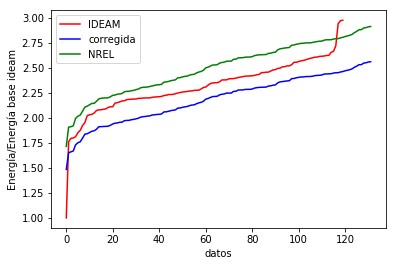

In [36]:
graficas(ideam_uribia,corta_uribia_corregida,nrel_uribia)

In [37]:
mbe_corta_uribia=MBE(corta_uribia_corregida,ideam_uribia)
rmse_corta_uribia=RMSE(corta_uribia_corregida,ideam_uribia)
pvalue_corta_uribia=KSI(promedio_corta_uribia,promedio_ideam_uribia)

El MBE es: -5.36%
El RMSE es: 7.44%
El pvalue es: 0.09%


Comparando los indicadores de error con los que se calcularon en el caso anterior para la misma ciudad, se puede ver cómo aumentan cada uno de ellos al tomar sólo tres meses para realizar el ajuste. El pvalue se vuelve casi cero, indicando que los datos no provienen de la serie de IDEAM. Así mismo, el error RMSE pasa de 4.32% a 7.44% mientras que, por su parte, el MBE llega a un valor de -5.36%, cuando el primero calculado fue de 1.61%.

Como ya fue mostrado para la ciudad de Cali, se vuelve a ver el impacto negativo de utilizar series menores a un año para construir series ajustadas. lo anterior se sigue dando sin importar que la serie de datos satelitales sea similar a la serie medida en tierra, como lo fue en este caso.

## Medellín

Para empezar, se determina la ENFICC para los datos proporcionados por IDEAM y NREL:

In [38]:
promedio_ideam_medellin=GHIprom(ideam_medellin)
enficc_ideam_medellin=ENFICC(promedio_ideam_medellin)
promedio_nrel_medellin=GHIprom(nrel_medellin)
enficc_nrel_medellin=ENFICC(promedio_nrel_medellin)

La ENFICC 99% es 3.53519358791 kW/m^2
La ENFICC 99% es 4.32600282796 kW/m^2


Teniendo en cuenta los valores mostrados, se puede ver que la ENFICC para la serie satelital es mayor por 0.7 kW/m^2 que el resultado de la serie medida en tierra. Para ver mejor esta diferencia,se tomará una serie de 3 años para realizar un ajuste.De igual manera,esto se realizará con la finalidad de observar el efecto que tiene utilizar una serie de esta cantidad de datos en la corrección. 

In [39]:
medellin_corta=ideam_medellin[(ideam_medellin['AÑO']>=2006) & (ideam_medellin['AÑO']<=2008)] #se toma el año deseado.
medellin_corta_corregida=MCP(medellin_corta,nrel_medellin) #Se realiza el ajuste
promedio_corta_medellin=GHIprom(medellin_corta_corregida) #Se determina la serie con los promedios diarios mensuales
enficc_medellin_corta=ENFICC(promedio_corta_medellin) #se determina la ENFICC

La ENFICC 99% es 3.65202537808 kW/m^2


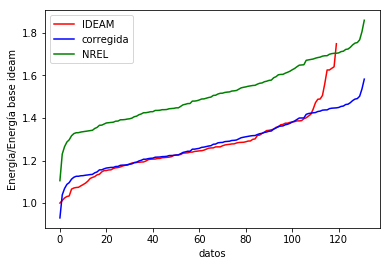

In [40]:
graficas(ideam_medellin,medellin_corta_corregida,nrel_medellin)

In [41]:
mbe_medellin_corta=MBE(medellin_corta_corregida,ideam_medellin)
rmse_medellin_corta=RMSE(medellin_corta_corregida,ideam_medellin)
pvalue_medellin_corta=KSI(promedio_corta_medellin,promedio_ideam_medellin)

El MBE es: 1.50%
El RMSE es: 5.72%
El pvalue es: 21.96%


Analizando el valor de la ENFICC y la gráfica obtenida, se puede observar cómo de la correción realizada, en este caso, se obtienen bajos indicadores de error. Esto se tiene, en gran medida, por el hecho de haber tomado tres años para realizar el ajuste. A continuación, se tomará sólo un año para llevar a cabo la corrección, contrastando las diferencias obtenidas con el caso recién visto.

In [42]:
medellin_2014=ideam_medellin[ideam_medellin['AÑO']==2014] #se toma el año deseado.
medellin_2014_corregida=MCP(medellin_2014,nrel_medellin) #Se realiza el ajuste
promedio_medellin_2014=GHIprom(medellin_2014_corregida) #Se determina la serie con los promedios diarios mensuales
enficc_medellin_2014=ENFICC(promedio_medellin_2014) #se determina la ENFICC

La ENFICC 99% es 3.73068764873 kW/m^2


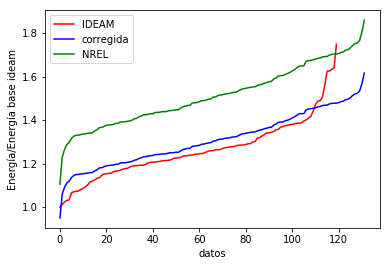

In [43]:
graficas(ideam_medellin,medellin_2014_corregida,nrel_medellin)

In [44]:
mbe_medellin_2014=MBE(medellin_2014_corregida,ideam_medellin)
rmse_medellin_2014=RMSE(medellin_2014_corregida,ideam_medellin)
pvalue_medellin_2014=KSI(promedio_medellin_2014,promedio_ideam_medellin)

El MBE es: 3.68%
El RMSE es: 7.99%
El pvalue es: 0.91%


Se puede observar el aumento en los errores con respecto al caso anterior, en el que se toman 3 años para realizar el ajuste. El indicador que más se ve afectado es el pvalue, pasando de 21.96% a 0.91%. De igual forma, se tiene un aumento de, aproximadamente, 2% en los errores MBE y RMSE. Lo anterior muestra, una vez más, el efecto de utlizar series de poca temporalidad para realizar correciones. 

## Conlcusiones

Habiendo analizado las anteriores localizaciones, es posible conlcluir que, aunque el método MCP es, en algunos casos, efectivo para realizar ajustes a series cuando no se tienen la suficiente cantidad de datos, se debe tener presente el periodo de tiempo con el que se realizará la corrección. Puede que se tenga un año en el que se haya presentado fenómeno de El Niño o La Niña, lo cual genera discrepancias entre la serie obtenida y la original. Además de esto, se confirma que usar series inferiores a un año genera más diferencias también, aumentando los indicadores de error, razón por la cual se pide, como mínimo, un año. 
Al tomar más de un año como referencia para realizar el ajuste, los errores se reducen, de igual forma, con respecto a cuando se toma un año o menores cantidades de tiempo.
Por las anteriores razones, se debería tener un previo estudio del comportamiento climático en el periodo de tiempo que se tenga disponible para llevar a cabo este método. De no realizar esto, se pueden llegar a errores que generen sesgo a la hora de tomar decisiones con respecto a los valores calculados de la ENFICC.